<a href="https://colab.research.google.com/github/on-ferreira/NBAPlayers-Prediction-Stats/blob/main/Studying_the_data_NBA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns# Carregando dataset


df = pd.read_csv("stephen curry.csv")

In [ ]:
df = df.drop(columns = ['Unnamed: 0'])
print(df)

        MP    FG   FGA    FG%   3P   3PA    3P%    FT   FTA    FT%  ...  STL%  \
0    35.61  14.0  26.0  0.538  5.0  12.0  0.417   7.0   7.0  1.000  ...   2.7   
1    27.40   9.0  15.0  0.600  4.0   9.0  0.444   3.0   4.0  0.750  ...   1.8   
2    35.63  17.0  27.0  0.630  8.0  14.0  0.571  11.0  11.0  1.000  ...   5.1   
3    28.40  10.0  16.0  0.625  4.0   8.0  0.500   6.0   6.0  1.000  ...   5.0   
4    32.63   8.0  17.0  0.471  7.0  11.0  0.636   8.0   9.0  0.889  ...   1.5   
..     ...   ...   ...    ...  ...   ...    ...   ...   ...    ...  ...   ...   
513  32.18   9.0  21.0  0.429  5.0  12.0  0.417   6.0   7.0  0.857  ...   4.6   
514  37.13  12.0  22.0  0.545  6.0  11.0  0.545   1.0   1.0  1.000  ...   2.8   
515  40.68  14.0  26.0  0.538  7.0  14.0  0.500   8.0   9.0  0.889  ...   0.0   
516  37.13   7.0  22.0  0.318  0.0   9.0  0.000   2.0   3.0  0.667  ...   2.7   
517  39.93  12.0  21.0  0.571  6.0  11.0  0.545   4.0   4.0  1.000  ...   2.6   

     BLK%  TOV%  USG%   ORt

In [ ]:
df2 = df.drop(columns=["FTA", "ORB", "DRB", "eFG%","ORtg","DRtg",'+/-', 'MP.1','ORB%', 'DRB%','TRB%', 'AST%',
       'STL%', 'BLK%', 'TOV%', 'USG%'])

Quais são os clusters formados entre pontos e minutos jogados[MP]?

In [ ]:
print(df2.columns)

Index(['MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', 'FT', 'FT%', 'TRB', 'AST',
       'STL', 'BLK', 'TOV', 'PF', 'PTS', 'TS%', '3PAr', 'FTr', 'BPM', 'opp',
       'season', 'date'],
      dtype='object')


<Figure size 2304x1152 with 0 Axes>

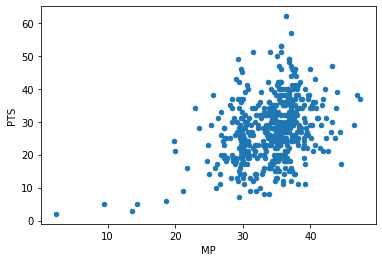

In [ ]:
plt.figure(figsize=(8,4),dpi=288)
df2.plot(kind='scatter', x="MP", y="PTS")
plt.show()

In [ ]:
print(df2.corr())

In [ ]:
df2 = df2.drop(columns=['date'])

In [ ]:
df.opp.unique()
dicTeams = {'NOP':'1', 'HOU':'2', 'MEM':'3', 'LAC':'4', 'DEN':'5', 'SAC':'6', 'DET':'7', 'MIN':'8', 'BRK':'9',
       'TOR':'10', 'CHI':'11', 'LAL':'12', 'PHO':'13', 'UTA':'14', 'CHO':'15', 'IND':'16', 'BOS':'17', 'MIL':'18',
       'CLE':'19', 'DAL':'20', 'POR':'21', 'MIA':'22', 'SAS':'23', 'PHI':'24', 'NYK':'25', 'WAS':'26', 'OKC':'27',
       'ATL':'28', 'ORL':'29'}

df2['opp'] = df2['opp'].map(dicTeams)


<ipython-input-60-5607f897934f>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['opp'] = df2['opp'].map(dicTeams)


In [ ]:
df2 = df.dropna()
print(df2)

        MP    FG   FGA    FG%   3P   3PA    3P%    FT   FTA    FT%  ...  STL%  \
0    35.61  14.0  26.0  0.538  5.0  12.0  0.417   7.0   7.0  1.000  ...   2.7   
1    27.40   9.0  15.0  0.600  4.0   9.0  0.444   3.0   4.0  0.750  ...   1.8   
2    35.63  17.0  27.0  0.630  8.0  14.0  0.571  11.0  11.0  1.000  ...   5.1   
3    28.40  10.0  16.0  0.625  4.0   8.0  0.500   6.0   6.0  1.000  ...   5.0   
4    32.63   8.0  17.0  0.471  7.0  11.0  0.636   8.0   9.0  0.889  ...   1.5   
..     ...   ...   ...    ...  ...   ...    ...   ...   ...    ...  ...   ...   
513  32.18   9.0  21.0  0.429  5.0  12.0  0.417   6.0   7.0  0.857  ...   4.6   
514  37.13  12.0  22.0  0.545  6.0  11.0  0.545   1.0   1.0  1.000  ...   2.8   
515  40.68  14.0  26.0  0.538  7.0  14.0  0.500   8.0   9.0  0.889  ...   0.0   
516  37.13   7.0  22.0  0.318  0.0   9.0  0.000   2.0   3.0  0.667  ...   2.7   
517  39.93  12.0  21.0  0.571  6.0  11.0  0.545   4.0   4.0  1.000  ...   2.6   

     BLK%  TOV%  USG%   ORt

Text(0.5, 1.0, 'Importância de cada feature')

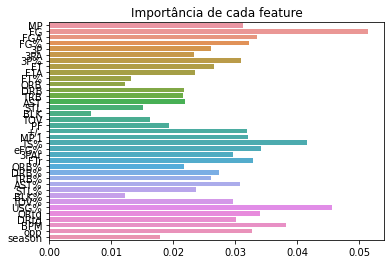

In [ ]:
X = df2.drop(columns=['PTS'])
y = df2.PTS# Criando conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)# Treinando modelo
model  = RandomForestClassifier()
model.fit(X_train, y_train) # Mostrando importância de cada feature
model.feature_importances_

importances = pd.Series(data=model.feature_importances_, index=df2.drop(columns=['PTS']).columns)
sns.barplot(x=importances, y=importances.index, orient='h').set_title('Importância de cada feature')

In [ ]:
# Calculate the mean and standard deviation of the column
column = 'MP'
mean = df2[column].mean()
std = df2[column].std()

# Select only the values within +-2 standard deviations of the mean
df3 = df2[(df2[column] > mean - 2*std) & (df2[column] < mean + 2*std)]

<Figure size 2304x1152 with 0 Axes>

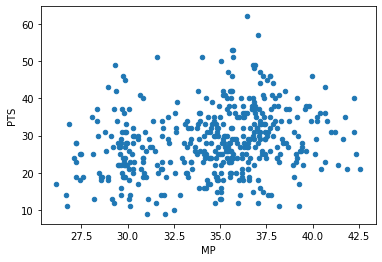

In [ ]:
plt.figure(figsize=(8,4),dpi=288)
df3.plot(kind='scatter', x="MP", y="PTS")
plt.show()